# Analysis of company size change in popular industry fields

## Data Wrangling

In [724]:
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
import matplotlib as mpl
# machine learning
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [615]:
mpl.rc('font', family='serif')

In [616]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)
df

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426191,902985,2018-07-17,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,https://www.linkedin.com/company/428083,Restaurants,2018-07-17 17:17:08.8897+00,2018-07-17 17:17:08.889725+00,NaN,http://www.diversifiedrestaurantholdings.com,NaN,NaN,NaN
2426192,903052,2018-07-17,First Financial Northwest Bank,785,118,https://www.linkedin.com/company/497673,Banking,2018-07-17 15:54:35.807059+00,2018-07-17 15:54:35.807085+00,NaN,http://www.ffnwb.com,NaN,NaN,NaN
2426193,902948,2018-07-17,DMC Global Inc.,1521,184,https://www.linkedin.com/company/586890,Oil & Energy,2018-07-17 13:44:19.302482+00,2018-07-17 13:44:19.302508+00,NaN,http://www.dmcglobal.com,NaN,NaN,NaN
2426194,910210,2018-07-17,ServiceSource,27963,2496,https://www.linkedin.com/company/11889,Information Technology and Services,2018-07-17 17:28:48.430667+00,2018-07-17 17:28:48.430717+00,NaN,http://www.servicesource.com,NaN,NaN,NaN


In [617]:
df.dtypes

dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

In [618]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [619]:
df.isnull().sum()

dataset_id                     0
as_of_date                     0
company_name                   0
followers_count                0
employees_on_platform          0
link                           0
industry                   36265
date_added                     0
date_updated                   0
description              1825278
website                  1935971
entity_id                2426196
cusip                    2426196
isin                     2426196
dtype: int64

In [620]:
df.duplicated().sum()

0

#### Group and slice dataframe by "industry"

In [621]:
grouped=df.groupby('industry',as_index=False)
# create list of df, each df is a industry
# the index of each df is automatically generated based on alphabetic order of industry name
industry=[group for name,group in grouped]
industry_name=[name for name,group in grouped]

In [622]:
industry[7]

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
14,58437,2015-09-16,RBC,179389,56844,https://www.linkedin.com/company/1808,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
26,58444,2015-09-16,Banco Santander,290743,70869,https://www.linkedin.com/company/2873,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
48,58456,2015-09-16,U.S. Bank,105109,37803,https://www.linkedin.com/company/2532,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
62,58415,2015-09-16,Scotiabank,142360,35426,https://www.linkedin.com/company/3139,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426180,899084,2018-07-17,FirstBank,9557,1168,https://www.linkedin.com/company/1047754,Banking,2018-07-17 18:48:36.142365+00,2018-07-17 18:48:36.142391+00,NaN,http://www.1firstbank.com,NaN,NaN,NaN
2426184,893569,2018-07-17,First Internet Bank,976,175,https://www.linkedin.com/company/373268,Banking,2018-07-17 16:15:26.888715+00,2018-07-17 16:15:26.888741+00,NaN,https://www.firstib.com,NaN,NaN,NaN
2426188,923931,2018-07-17,Macatawa Bank,3127,352,https://www.linkedin.com/company/55981,Banking,2018-07-17 16:32:14.019549+00,2018-07-17 16:32:14.019575+00,NaN,http://www.macatawabank.com,NaN,NaN,NaN
2426190,920765,2018-07-17,Howard Bank,4008,585,https://www.linkedin.com/company/90997,Banking,2018-07-17 16:06:50.083625+00,2018-07-17 16:06:50.083651+00,NaN,http://www.howardbank.com,NaN,NaN,NaN


In [623]:
# sort the industry by the number of employees
industry_max = grouped['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
industry_max

,industry,employees_on_platform
62,Information Technology and Services,577952
119,Retail,411073
40,Financial Services,261637
7,Banking,261629
65,Internet,261440
33,Electrical/Electronic Manufacturing,235691
127,Telecommunications,230061
118,Restaurants,223229
23,Consumer Electronics,186050
56,Hospitality,178114


In [624]:
# create a dictionary with the industry name as the key, df as the value
top_dict = {}
for i in industry_max.index:
    top_dict[industry_max['industry'][i]] = industry[i]

In [625]:
top_dict.keys()

dict_keys(['Information Technology and Services', 'Retail', 'Financial Services', 'Banking', 'Internet', 'Electrical/Electronic Manufacturing', 'Telecommunications', 'Restaurants', 'Consumer Electronics', 'Hospitality'])

In [626]:
# slice out the dataframe of each top industry
its = top_dict['Information Technology and Services']
retail = top_dict['Retail']
finance = top_dict['Financial Services']
banking = top_dict['Banking']
internet = top_dict['Internet']
electron = top_dict['Electrical/Electronic Manufacturing']
tele = top_dict['Telecommunications']
restaurant = top_dict['Restaurants']
consumer = top_dict['Consumer Electronics']
hospitality = top_dict['Hospitality']

#### Group and slice df by company in each industry

In [627]:
# group by company in each industry
# and create list of df of each company in each industry
its_ = its.groupby('company_name', as_index=False)
its_list=[group for name,group in its_]
retail_ = retail.groupby('company_name', as_index=False)
retail_list=[group for name, group in retail_]
finance_ = finance.groupby('company_name', as_index=False)
finance_list = [group for name, group in finance_]
banking_ = banking.groupby('company_name', as_index=False)
banking_list = [group for name, group in banking_]
internet_ = internet.groupby('company_name', as_index=False)
internet_list = [group for name, group in internet_]
electron_ = electron.groupby('company_name', as_index=False)
electron_list = [group for name, group in electron_]
tele_ = tele.groupby('company_name', as_index=False)
tele_list = [group for name, group in tele_]
restaurant_ = restaurant.groupby('company_name', as_index=False)
rest_list = [group for name, group in restaurant_]
consumer_ = consumer.groupby('company_name', as_index=False)
consumer_list = [group for name, group in consumer_]
hospitality_ = hospitality.groupby('company_name', as_index=False)
hosp_list = [group for name, group in hospitality_]

In [628]:
# Calculate the statistic features of each company
its_company = its_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
its_company['cv'] = its_company['std']/its_company['mean']
its_company['change']=0
# Calculate the difference of employees number from the first to the last record
for i in its_company.index:
    its_company.loc[i, 'change']=its_list[i]['employees_on_platform'].iloc[-1]-its_list[i]['employees_on_platform'].iloc[0]
# Normalize the difference by mean
its_company['change']=its_company['change']/its_company['mean']
# Create a column to label industry
its_company['industry'] = 'Information Technology and Services'
its_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services
...,...,...,...,...,...,...,...,...,...,...
203,Zebra Technologies,669,5939.710015,6014.0,4927,6752,461.923490,0.077769,0.293449,Information Technology and Services
204,athenahealth,687,4988.331878,5191.0,4262,5285,303.277390,0.060797,0.181423,Information Technology and Services
205,genpact,20,87152.150000,87191.5,86618,87565,318.387429,0.003653,0.009799,Information Technology and Services
206,huaduo,94,34.978723,35.0,33,35,0.206284,0.005897,-0.057178,Information Technology and Services


In [ ]:
its_company.sort_values

In [629]:
its_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              9
change          9
industry        0
dtype: int64

In [630]:
its_company.dropna(inplace=True)
its_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [631]:
retail_company = retail_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
retail_company['cv'] = retail_company['std']/retail_company['mean']
retail_company['change']=0
for i in retail_company.index:
    retail_company.loc[i, 'change']=retail_list[i]['employees_on_platform'].iloc[-1]-retail_list[i]['employees_on_platform'].iloc[0]   
retail_company['change']=retail_company['change']/retail_company['mean']
retail_company['industry'] = 'Retail'
retail_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,"1-800-FLOWERS.COM, INC.",375,1747.224000,2278.0,819,2418,706.115568,0.404136,0.908298,Retail
1,1800PetMeds,629,92.349762,99.0,59,121,18.932711,0.205011,0.671361,Retail
2,AMERICAN EAGLE OUTFITTERS INC.,667,13093.923538,12701.0,10574,15120,1167.572970,0.089169,0.346878,Retail
3,ANN INC (Ann Taylor | LOFT | Lou & Grey),93,3643.064516,3643.0,3643,3649,0.622171,0.000171,-0.001647,Retail
4,"Aaron Brothers, Inc.",425,414.870588,411.0,383,466,22.507540,0.054252,0.188010,Retail
...,...,...,...,...,...,...,...,...,...,...
172,Zumiez,717,2366.146444,2390.0,1804,2868,315.389246,0.133292,0.449676,Retail
173,francesca’s®,702,1957.954416,1979.0,1488,2409,262.779710,0.134211,0.463749,Retail
174,lululemon,540,7686.750000,7618.0,6833,8636,573.136773,0.074562,0.233519,Retail
175,lululemon athletica,423,5664.706856,5468.0,4855,6836,531.930379,0.093903,0.349709,Retail


In [632]:
retail_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [633]:
finance_company = finance_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
finance_company['cv'] = finance_company['std']/finance_company['mean']
finance_company['change']=0
for i in finance_company.index:
    finance_company.loc[i, 'change']=finance_list[i]['employees_on_platform'].iloc[-1]-finance_list[i]['employees_on_platform'].iloc[0]   
finance_company['change']=finance_company['change']/finance_company['mean']
finance_company['industry'] = 'Financial Services'
finance_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,1st Constitution Bank,463,136.198704,136.0,132,141,2.102214,0.015435,0.007342,Financial Services
1,ACNB Bank,220,139.309091,140.0,133,145,3.922178,0.028154,0.086139,Financial Services
2,AFCPE® (Association for Financial Counseling a...,93,31.849462,32.0,31,32,0.359536,0.011289,0.000000,Financial Services
3,ARC Financial Services,92,20.000000,20.0,20,20,0.000000,0.000000,0.000000,Financial Services
4,Aegon,591,20261.186125,6980.0,6302,40907,15716.045746,0.775673,1.707106,Financial Services
...,...,...,...,...,...,...,...,...,...,...
298,World Acceptance Corporation (WRLD),472,204.224576,203.0,154,254,28.256867,0.138362,0.489657,Financial Services
299,Yandex.Money,93,270.989247,271.0,270,271,0.103695,0.000383,0.000000,Financial Services
300,York Mortgage,94,4.000000,4.0,4,4,0.000000,0.000000,0.000000,Financial Services
301,eNett International,1,246.000000,246.0,246,246,NaN,NaN,0.000000,Financial Services


In [634]:
finance_company.isnull().sum()

company_name     0
count            0
mean             0
median           0
min              0
max              0
std              4
cv              12
change           8
industry         0
dtype: int64

In [635]:
finance_company.dropna(inplace=True)
finance_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [636]:
banking_company = banking_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
banking_company['cv'] = banking_company['std']/banking_company['mean']
banking_company['change']=0
for i in banking_company.index:
    banking_company.loc[i, 'change']=banking_list[i]['employees_on_platform'].iloc[-1]-banking_list[i]['employees_on_platform'].iloc[0]   
banking_company['change']=banking_company['change']/banking_company['mean']
banking_company['industry'] = 'Banking'
banking_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,1st Security Bank of Washington,560,212.662500,215.0,185,239,15.709870,0.073872,0.249221,Banking
1,1st Source Bank,595,841.789916,845.0,737,921,48.741584,0.057902,0.163936,Banking
2,ACNB Bank,374,130.029412,131.0,123,134,3.004321,0.023105,0.030762,Banking
3,Access National Bank,594,178.461279,176.0,149,217,19.930639,0.111680,0.330604,Banking
4,Alliance Association Bank,666,42.310811,43.0,35,45,2.215686,0.052367,0.212712,Banking
...,...,...,...,...,...,...,...,...,...,...
330,"Whidbey Island Bank, A Division of Heritage Bank",598,109.556856,109.0,104,113,2.296150,0.020959,-0.009128,Banking
331,Wisconsin Bank & Trust,581,131.686747,134.0,116,141,6.292166,0.047781,0.129094,Banking
332,Wisconsin Bank &amp; Trust,19,118.105263,118.0,118,120,0.458831,0.003885,0.016934,Banking
333,Zions Bancorporation,93,2841.913978,2842.0,2838,2842,0.583392,0.000205,0.001408,Banking


In [637]:
banking_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             4
cv              6
change          2
industry        0
dtype: int64

In [638]:
banking_company.dropna(inplace=True)
banking_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [639]:
internet_company = internet_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
internet_company['cv'] = internet_company['std']/internet_company['mean']
internet_company['change']=0
for i in internet_company.index:
    internet_company.loc[i, 'change']=internet_list[i]['employees_on_platform'].iloc[-1]-internet_list[i]['employees_on_platform'].iloc[0]   
internet_company['change']=internet_company['change']/internet_company['mean']
internet_company['industry'] = 'Internet'
internet_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,Professional Diversity Network,181,64.906077,65.0,63,68,1.385246,0.021342,-0.015407,Internet
1,"21Vianet Group,Inc.",93,453.000000,453.0,453,453,0.000000,0.000000,0.000000,Internet
2,58.Com Inc,950,2035.218947,2285.0,524,2942,680.301525,0.334265,1.187587,Internet
3,AOL,944,8202.255297,9203.0,3596,12933,2841.231061,0.346396,-0.180438,Internet
4,About.com,93,436.075269,436.0,436,443,0.725866,0.001665,-0.016052,Internet
...,...,...,...,...,...,...,...,...,...,...
162,eHealth Inc,572,660.248252,643.0,0,750,55.778282,0.084481,0.286256,Internet
163,"eHealth, Inc.",387,821.374677,824.0,746,873,38.593090,0.046986,0.138792,Internet
164,neu.de GmbH,94,3.000000,3.0,3,3,0.000000,0.000000,0.000000,Internet
165,tuniu.com,637,1329.021978,1380.0,889,1541,170.094127,0.127984,0.483062,Internet


In [640]:
internet_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             1
cv              4
change          3
industry        0
dtype: int64

In [641]:
internet_company.dropna(inplace=True)
internet_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [642]:
electron_company = electron_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
electron_company['cv'] = electron_company['std']/electron_company['mean']
electron_company['change']=0
for i in electron_company.index:
    electron_company.loc[i, 'change']=electron_list[i]['employees_on_platform'].iloc[-1]-electron_list[i]['employees_on_platform'].iloc[0]   
electron_company['change']=electron_company['change']/electron_company['mean']
electron_company['industry'] = 'Electrical/Electronic Manufacturing'
electron_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,ABB,377,90534.533156,90414.0,86132,95566,2396.753430,0.026473,0.104203,Electrical/Electronic Manufacturing
1,ALPHA ADVANCED MATERIALS,566,23.215548,24.0,20,26,2.142574,0.092290,0.258447,Electrical/Electronic Manufacturing
2,AMETEK,963,3078.039460,2950.0,2700,3797,328.370975,0.106682,0.315785,Electrical/Electronic Manufacturing
3,AUO,582,4470.412371,4535.0,3265,5234,521.382300,0.116630,0.365067,Electrical/Electronic Manufacturing
4,AVX,395,987.992405,1001.0,824,1100,73.120077,0.074009,0.218625,Electrical/Electronic Manufacturing
...,...,...,...,...,...,...,...,...,...,...
111,Vicor Corporation,471,645.798301,639.0,580,712,36.604320,0.056681,0.204398,Electrical/Electronic Manufacturing
112,"Vishay Intertechnology, Inc.",568,2782.904930,2799.0,2419,2988,132.077691,0.047460,0.204463,Electrical/Electronic Manufacturing
113,"Vishay Precision Group, Inc. (VPG)",568,542.228873,546.0,458,620,36.725548,0.067731,0.291390,Electrical/Electronic Manufacturing
114,WESCO Distribution,567,5499.396825,5200.0,4775,6399,667.660323,0.121406,0.215478,Electrical/Electronic Manufacturing


In [643]:
electron_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [644]:
tele_company = tele_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
tele_company['cv'] = tele_company['std']/tele_company['mean']
tele_company['change']=0
for i in tele_company.index:
    tele_company.loc[i, 'change']=tele_list[i]['employees_on_platform'].iloc[-1]-tele_list[i]['employees_on_platform'].iloc[0]   
tele_company['change']=tele_company['change']/tele_company['mean']
tele_company['industry'] = 'Telecommunications'
tele_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,ADC,93,2867.967742,2868.0,2866,2868,0.230859,0.000080,0.000697,Telecommunications
1,ADTRAN,593,1735.188870,1770.0,1501,1868,101.320895,0.058392,0.170587,Telecommunications
2,ARRIS,687,5368.304221,5295.0,4755,5985,303.837615,0.056598,0.229123,Telecommunications
3,AT&T,865,203266.291329,211265.0,159473,230061,20441.171632,0.100564,0.285837,Telecommunications
4,AT&T Innovation,93,9.000000,9.0,9,9,0.000000,0.000000,0.000000,Telecommunications
...,...,...,...,...,...,...,...,...,...,...
136,XTAR,530,23.092453,23.0,17,24,0.540373,0.023400,0.259825,Telecommunications
137,Zayo Group,947,2326.321014,2230.0,1889,3040,348.643921,0.149869,0.491334,Telecommunications
138,Ziggo voor ondernemers,94,0.000000,0.0,0,0,0.000000,NaN,NaN,Telecommunications
139,magicJack,360,70.441667,71.0,63,74,2.668696,0.037885,0.127765,Telecommunications


In [645]:
tele_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              3
change          3
industry        0
dtype: int64

In [646]:
tele_company.dropna(inplace=True)
tele_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [647]:
rest_company = restaurant_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
rest_company['cv'] = rest_company['std']/rest_company['mean']
rest_company['change']=0
for i in rest_company.index:
    rest_company.loc[i, 'change']=rest_list[i]['employees_on_platform'].iloc[-1]-rest_list[i]['employees_on_platform'].iloc[0]   
rest_company['change']=rest_company['change']/rest_company['mean']
rest_company['industry'] = 'Restaurants'
rest_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,21 Club,2,167.000000,167.0,167,167,0.000000,0.000000,0.000000,Restaurants
1,Applebee's,417,1680.688249,1592.0,1328,3369,302.404632,0.179929,-0.385556,Restaurants
2,Applebee's Neighborhood Grill + Bar,486,1460.432099,1426.0,1340,1593,67.573484,0.046270,0.115034,Restaurants
3,"BJ's Restaurants, Inc.",643,3550.765163,3558.0,2803,4145,329.188844,0.092709,0.367245,Restaurants
4,Bahama Breeze,723,700.344398,707.0,546,864,94.639213,0.135132,0.452634,Restaurants
...,...,...,...,...,...,...,...,...,...,...
60,"Wingstop Restaurants, Inc.",375,1334.520000,1286.0,1078,1698,179.737328,0.134683,0.464587,Restaurants
61,Yard House Restaurants,723,828.860304,832.0,579,1092,141.529501,0.170752,0.617716,Restaurants
62,Yum China,359,223.880223,224.0,172,272,29.295635,0.130854,0.442201,Restaurants
63,Yum! Brands,948,7557.731013,8219.5,4134,10282,1949.269468,0.257917,0.813472,Restaurants


In [648]:
rest_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [649]:
consumer_company = consumer_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
consumer_company['cv'] = consumer_company['std']/consumer_company['mean']
consumer_company['change']=0
for i in consumer_company.index:
    consumer_company.loc[i, 'change']=consumer_list[i]['employees_on_platform'].iloc[-1]-consumer_list[i]['employees_on_platform'].iloc[0]   
consumer_company['change']=consumer_company['change']/consumer_company['mean']
consumer_company['industry'] = 'Consumer Electronics'
consumer_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,Apple,970,149213.005155,154571.0,90359,186050,25546.401403,0.171208,0.550394,Consumer Electronics
1,Canon USA,431,5819.004640,8127.0,2534,8415,2807.616866,0.482491,1.009451,Consumer Electronics
2,"China BAK Battery, Inc.",93,27.010753,27.0,27,28,0.103695,0.003839,0.037022,Consumer Electronics
3,Control4,562,559.081851,563.0,491,607,31.945147,0.057139,0.203906,Consumer Electronics
4,Dolby Laboratories,687,1931.023290,1925.0,1865,2019,39.087359,0.020242,0.020197,Consumer Electronics
5,Garmin International,965,4688.069430,4634.0,3918,5530,460.173004,0.098158,0.274313,Consumer Electronics
6,GoPro,960,1776.816667,1758.5,1517,2061,146.070275,0.082209,-0.003377,Consumer Electronics
7,Grubby Games,94,0.000000,0.0,0,0,0.000000,NaN,NaN,Consumer Electronics
8,"Klipsch Group, Inc.",93,203.838710,204.0,202,204,0.449404,0.002205,0.000000,Consumer Electronics
9,Koss Corporation,348,99.100575,103.0,91,104,5.307132,0.053553,0.100908,Consumer Electronics


In [650]:
consumer_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             1
cv              2
change          1
industry        0
dtype: int64

In [651]:
consumer_company.dropna(inplace=True)
consumer_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [652]:
hosp_company = hospitality_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
hosp_company['cv'] = hosp_company['std']/hosp_company['mean']
hosp_company['change']=0
for i in hosp_company.index:
    hosp_company.loc[i, 'change']=hosp_list[i]['employees_on_platform'].iloc[-1]-hosp_list[i]['employees_on_platform'].iloc[0]   
hosp_company['change']=hosp_company['change']/hosp_company['mean']
hosp_company['industry'] = 'Hospitality'
hosp_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,Bluegreen Vacations,237,2783.700422,2778.0,2700,2901,56.284226,0.020219,0.070769,Hospitality
1,Borgata Hotel Casino & Spa,93,1511.032258,1511.0,1511,1513,0.230859,0.000153,-0.000662,Hospitality
2,Chesapeake Lodging Trust,1013,13.108588,14.0,10,17,1.866084,0.142356,0.228858,Hospitality
3,China Lodging Group Ltd (Huazhu Hotels Group),93,1139.892473,1140.0,1134,1140,0.743996,0.000653,0.005264,Hospitality
4,Choice Hotels International,665,1578.772932,1618.0,1436,1904,83.115581,0.052646,0.065241,Hospitality
5,Civeo Australia,958,152.981211,157.0,123,172,13.271762,0.086754,0.313764,Hospitality
6,Civeo North America,958,874.821503,885.0,716,1032,91.927954,0.105082,0.145172,Hospitality
7,Commune Hotels + Resorts,93,166.021505,166.0,166,168,0.207390,0.001249,-0.012047,Hospitality
8,"Condor Hospitality Trust, Inc.",517,12.794971,12.0,8,16,2.261177,0.176724,0.547090,Hospitality
9,Conrad Hotels & Resorts,93,1374.989247,1375.0,1374,1375,0.103695,0.000075,0.000000,Hospitality


In [653]:
hosp_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              1
change          1
industry        0
dtype: int64

In [654]:
hosp_company.dropna(inplace=True)
hosp_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [740]:
company = its_company.append(retail_company, 
                             ignore_index=True).append(finance_company, 
                                                       ignore_index=True).append(banking_company, 
                                                                                 ignore_index=True).append(internet_company,
                                                                                                           ignore_index=True).append(electron_company,
                                                                                                                                     ignore_index=True)
company = company.append(tele_company, 
                         ignore_index=True).append(rest_company, 
                                                   ignore_index=True).append(consumer_company,
                                                                             ignore_index=True).append(hosp_company, 
                                                                                                       ignore_index=True)
company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services
...,...,...,...,...,...,...,...,...,...,...
1543,"Summit Hotel Properties, Inc.",354,46.593220,46.0,45,51,1.538389,0.033017,0.128774,Hospitality
1544,Sunstone Hotel Investors Inc.,93,85.000000,85.0,85,85,0.000000,0.000000,0.000000,Hospitality
1545,Workspring,165,10.357576,11.0,8,11,0.883118,0.085263,0.096548,Hospitality
1546,Workspring by Steelcase,227,8.149780,8.0,6,11,1.494692,0.183403,-0.490811,Hospitality


In [772]:
company_cls = company[['mean', 'change', 'cv']].copy()
company_cls

,mean,change,cv
0,1024.075269,-0.003906,0.000504
1,2155.892473,0.004175,0.000435
2,989.867450,0.473801,0.135553
3,5.000000,0.000000,0.000000
4,1355.446735,0.147553,0.051985
...,...,...,...
1543,46.593220,0.128774,0.033017
1544,85.000000,0.000000,0.000000
1545,10.357576,0.096548,0.085263
1546,8.149780,-0.490811,0.183403


#### Calculate the daily average of employee number of top 10 companies in each industry

In [656]:
# find the top 10 largest companies in the "its" industry
its_max = its_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
# slice the data of top 10 companies from the "its" parent df
its_top = its[its['company_name'].isin(its_max['company_name'].to_list())]
# calculate the daily average
its_mean = its_top.groupby('as_of_date', as_index=False).mean()
its_mean

,as_of_date,dataset_id,followers_count,employees_on_platform,entity_id,cusip,isin
0,2015-09-16,58422.750000,2.072906e+06,271997.750000,NaN,NaN,NaN
1,2015-09-17,58447.200000,1.800824e+06,249184.200000,NaN,NaN,NaN
2,2015-09-18,58489.166667,1.609611e+06,227383.333333,NaN,NaN,NaN
3,2015-09-19,58489.166667,1.610457e+06,227425.333333,NaN,NaN,NaN
4,2015-09-20,58489.166667,1.611292e+06,227467.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
966,2018-07-13,177399.857143,2.449116e+06,280326.000000,NaN,NaN,NaN
967,2018-07-14,177399.857143,2.449429e+06,281461.142857,NaN,NaN,NaN
968,2018-07-15,177399.857143,2.451821e+06,282464.142857,NaN,NaN,NaN
969,2018-07-16,177399.857143,2.453560e+06,282523.142857,NaN,NaN,NaN


In [657]:
# Select the top 10 companies in each industry
# and calculate the average daily number of employees
retail_max = retail_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
retail_top = retail[retail['company_name'].isin(retail_max['company_name'].to_list())]
retail_mean = retail_top.groupby('as_of_date', as_index=False).mean()

finance_max = finance_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
finance_top = finance[finance['company_name'].isin(finance_max['company_name'].to_list())]
finance_mean = finance_top.groupby('as_of_date', as_index=False).mean()

banking_max = banking_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
banking_top = banking[banking['company_name'].isin(banking_max['company_name'].to_list())]
banking_mean = banking_top.groupby('as_of_date', as_index=False).mean()

internet_max = internet_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
internet_top = internet[internet['company_name'].isin(internet_max['company_name'].to_list())]
internet_mean = internet_top.groupby('as_of_date', as_index=False).mean()

electron_max = electron_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
electron_top = electron[electron['company_name'].isin(electron_max['company_name'].to_list())]
electron_mean = electron_top.groupby('as_of_date', as_index=False).mean()

tele_max = tele_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
tele_top = tele[tele['company_name'].isin(tele_max['company_name'].to_list())]
tele_mean = tele_top.groupby('as_of_date', as_index=False).mean()

restaurant_max = restaurant_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
restaurant_top = restaurant[restaurant['company_name'].isin(restaurant_max['company_name'].to_list())]
restaurant_mean = restaurant_top.groupby('as_of_date', as_index=False).mean()

consumer_max = consumer_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
consumer_top = consumer[consumer['company_name'].isin(consumer_max['company_name'].to_list())]
consumer_mean = consumer_top.groupby('as_of_date', as_index=False).mean()

hospitality_max = hospitality_['employees_on_platform'].max().sort_values(by='employees_on_platform', ascending=False)[:10]
hospitality_top = hospitality[hospitality['company_name'].isin(hospitality_max['company_name'].to_list())]
hospitality_mean = hospitality_top.groupby('as_of_date', as_index=False).mean()

In [658]:
count=its_top.groupby('as_of_date', as_index=False).count()
count

,as_of_date,dataset_id,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,2015-09-16,4,4,4,4,4,4,4,4,0,0,0,0,0
1,2015-09-17,5,5,5,5,5,5,5,5,0,0,0,0,0
2,2015-09-18,6,6,6,6,6,6,6,6,0,0,0,0,0
3,2015-09-19,6,6,6,6,6,6,6,6,0,0,0,0,0
4,2015-09-20,6,6,6,6,6,6,6,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2018-07-13,7,7,7,7,7,7,7,7,0,7,0,0,0
967,2018-07-14,7,7,7,7,7,7,7,7,0,7,0,0,0
968,2018-07-15,7,7,7,7,7,7,7,7,0,7,0,0,0
969,2018-07-16,7,7,7,7,7,7,7,7,0,7,0,0,0


In [659]:
# make sure each date has at least 5 companies' data
count=its_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
its_mean=its_mean[its_mean.as_of_date.isin(dates)]

count=retail_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
retail_mean=retail_mean[retail_mean.as_of_date.isin(dates)]

count=finance_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
finance_mean=finance_mean[finance_mean.as_of_date.isin(dates)]

count=banking_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
banking_mean=banking_mean[banking_mean.as_of_date.isin(dates)]

count=internet_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
internet_mean=internet_mean[internet_mean.as_of_date.isin(dates)]

count=electron_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
electron_mean=electron_mean[electron_mean.as_of_date.isin(dates)]

count=tele_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
tele_mean=tele_mean[tele_mean.as_of_date.isin(dates)]

count=restaurant_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
restaurant_mean=restaurant_mean[restaurant_mean.as_of_date.isin(dates)]

count=consumer_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
consumer_mean=consumer_mean[consumer_mean.as_of_date.isin(dates)]

count=hospitality_top.groupby('as_of_date', as_index=False).count()
dates=count[count.employees_on_platform>=5].as_of_date.to_list()
hospitality_mean=hospitality_mean[hospitality_mean.as_of_date.isin(dates)]

In [663]:
# calculate the rolling average of employees in 7 days
its_mean['week_average_employees'] = its_mean['employees_on_platform'].rolling(window=7).mean()
retail_mean['week_average_employees'] = retail_mean['employees_on_platform'].rolling(window=7).mean()
finance_mean['week_average_employees'] = finance_mean['employees_on_platform'].rolling(window=7).mean()
banking_mean['week_average_employees'] = banking_mean['employees_on_platform'].rolling(window=7).mean()
internet_mean['week_average_employees'] = internet_mean['employees_on_platform'].rolling(window=7).mean()
electron_mean['week_average_employees'] = electron_mean['employees_on_platform'].rolling(window=7).mean()
tele_mean['week_average_employees'] = tele_mean['employees_on_platform'].rolling(window=7).mean()
restaurant_mean['week_average_employees'] = restaurant_mean['employees_on_platform'].rolling(window=7).mean()
consumer_mean['week_average_employees'] = consumer_mean['employees_on_platform'].rolling(window=7).mean()
hospitality_mean['week_average_employees'] = hospitality_mean['employees_on_platform'].rolling(window=7).mean()

# calculate the percent change of employees in 7 days
its_mean['pct_change_employees'] = its_mean['employees_on_platform'].pct_change(periods=7)
retail_mean['pct_change_employees'] = retail_mean['employees_on_platform'].pct_change(periods=7)
finance_mean['pct_change_employees'] = finance_mean['employees_on_platform'].pct_change(periods=7)
banking_mean['pct_change_employees'] = banking_mean['employees_on_platform'].pct_change(periods=7)
internet_mean['pct_change_employees'] = internet_mean['employees_on_platform'].pct_change(periods=7)
electron_mean['pct_change_employees'] = electron_mean['employees_on_platform'].pct_change(periods=7)
tele_mean['pct_change_employees'] = tele_mean['employees_on_platform'].pct_change(periods=7)
restaurant_mean['pct_change_employees'] = restaurant_mean['employees_on_platform'].pct_change(periods=7)
consumer_mean['pct_change_employees'] = consumer_mean['employees_on_platform'].pct_change(periods=7)
hospitality_mean['pct_change_employees'] = hospitality_mean['employees_on_platform'].pct_change(periods=7)

<ipython-input-663-b50ad5b2e8da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  its_mean['week_average_employees'] = its_mean['employees_on_platform'].rolling(window=7).mean()
<ipython-input-663-b50ad5b2e8da>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  its_mean['pct_change_employees'] = its_mean['employees_on_platform'].pct_change(periods=7)


## Exploratory data analysis


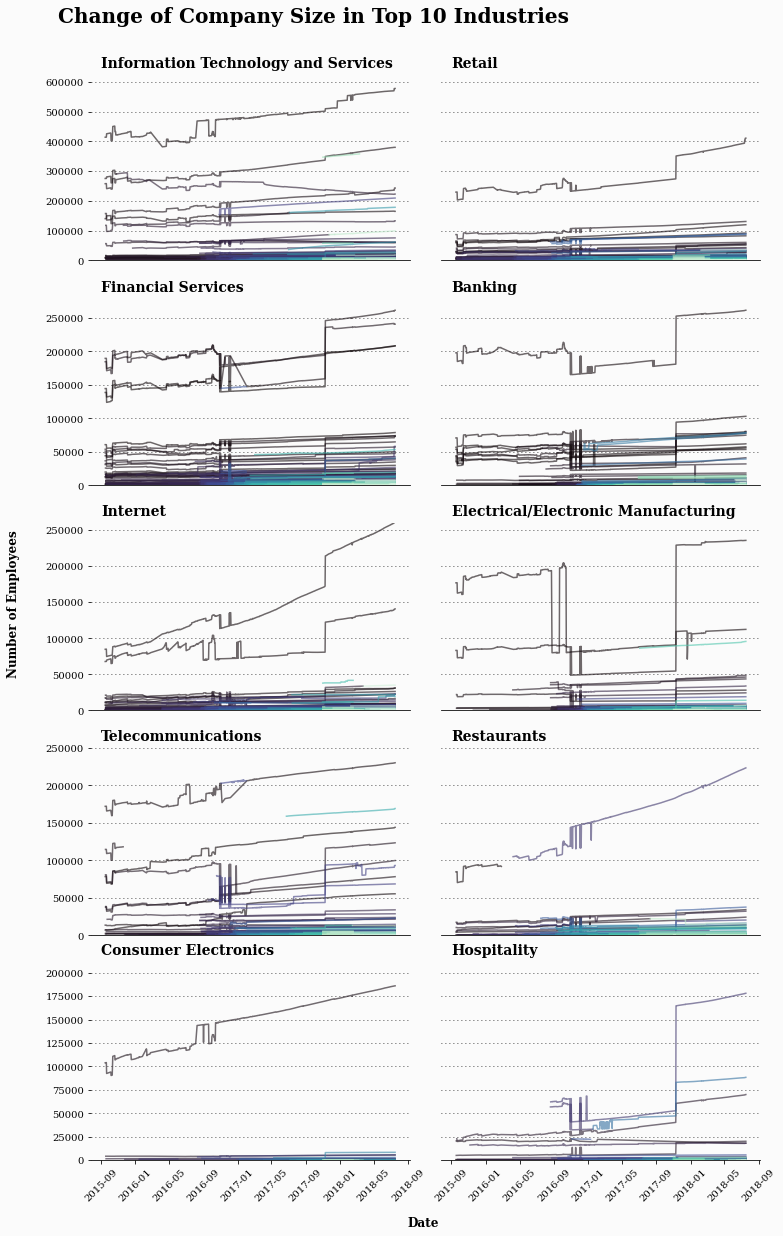

In [874]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[12, 20])
gs = fig.add_gridspec(5, 2)
gs.update(hspace=0.2, wspace=0.1)

# add ax for each plot
ax0 = fig.add_subplot(gs[0, 0], ylim = [0, 630000])
ax1 = fig.add_subplot(gs[0, 1], ylim = [0, 630000])
ax2 = fig.add_subplot(gs[1, 0], ylim = [0, 280000])
ax3 = fig.add_subplot(gs[1, 1], ylim = [0, 280000])
ax4 = fig.add_subplot(gs[2, 0], ylim = [0, 260000])
ax5 = fig.add_subplot(gs[2, 1], ylim = [0, 260000])
ax6 = fig.add_subplot(gs[3, 0], ylim = [0, 250000])
ax7 = fig.add_subplot(gs[3, 1], ylim = [0, 250000])
ax8 = fig.add_subplot(gs[4, 0], ylim = [0, 200000])
ax9 = fig.add_subplot(gs[4, 1], ylim = [0, 200000])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

# set the backgroud color
bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

# invisualize the top and right spines of plot
for s in ['top', 'left', 'right']:
    for ax in axes:
        ax.spines[s].set_visible(False)

# generate the lineplot
sns.lineplot(ax=ax0, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=its, 
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax1, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=retail,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax2, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=finance,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax3, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=banking,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax4, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=internet,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax5, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=electron,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax6, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=tele,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax7, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=restaurant,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax8, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=consumer,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax9, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=hospitality,
             legend=False, alpha=.6, palette='mako')

for ax in axes:
    ax.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


ax0.text(Timestamp('2015-09-01'), 650000, 'Information Technology and Services', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax1.text(Timestamp('2015-09-01'), 650000, 'Retail', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax2.text(Timestamp('2015-09-01'), 290000, 'Financial Services', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax3.text(Timestamp('2015-09-01'), 290000, 'Banking', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax4.text(Timestamp('2015-09-01'), 270000, 'Internet', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax5.text(Timestamp('2015-09-01'), 270000, 'Electrical/Electronic Manufacturing', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax6.text(Timestamp('2015-09-01'), 260000, 'Telecommunications', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax7.text(Timestamp('2015-09-01'), 260000, 'Restaurants', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax8.text(Timestamp('2015-09-01'), 220000, 'Consumer Electronics', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax9.text(Timestamp('2015-09-01'), 220000, 'Hospitality', 
         fontsize=14, fontweight='bold', fontfamily='serif')

ax0.text(Timestamp('2015-04-01'), 800000,
         'Change of Company Size in Top 10 Industries',
        fontsize=20, fontweight='bold', fontfamily='serif')
ax8.text(Timestamp('2018-09-01'), -70000,
         'Date',
         fontsize=12, fontweight='bold')

for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
ax4.text(Timestamp('2014-10-01'), 50000,
         'Number of Employees',
         fontsize=12, fontweight='bold', rotation =90)

left_axes = [ax0, ax2, ax4, ax6, ax8]
for ax in left_axes:
    for ytick in ax.get_yticklabels():
        ytick.set_fontsize(10)
        
ax0.set_xticklabels('')
ax0.tick_params(bottom=False)

ax1.set_xticklabels('')
ax1.set_yticklabels('')
ax1.tick_params(left=False)
ax1.tick_params(bottom=False)

ax2.set_xticklabels('')
ax2.tick_params(bottom=False)

ax3.set_xticklabels('')
ax3.set_yticklabels('')
ax3.tick_params(left=False)
ax3.tick_params(bottom=False)

ax4.set_xticklabels('')
ax4.tick_params(bottom=False)

ax5.set_xticklabels('')
ax5.set_yticklabels('')
ax5.tick_params(left=False)
ax5.tick_params(bottom=False)

ax6.set_xticklabels('')
ax6.tick_params(bottom=False)

ax7.set_xticklabels('')
ax7.set_yticklabels('')
ax7.tick_params(left=False)
ax7.tick_params(bottom=False)

ax9.set_yticklabels('')
ax9.tick_params(left=False)

bottom_axes = [ax8, ax9]
for ax in bottom_axes:
    for xtick in ax.get_xticklabels():
        xtick.set_rotation(45);

**This is the change of employee number in each companies over around three years.**

I selected the top 10 industries, those have the 10 largest companies. 

There are fluctuations in company size. Most of them are in the trend of expansion.

**Next, I'll compare the average size of representative companies in these industries.**

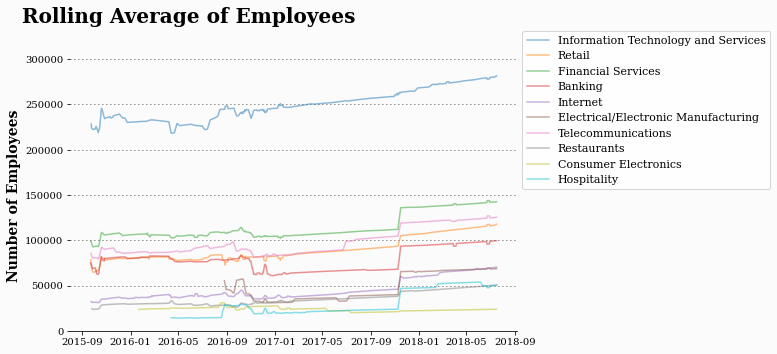

In [664]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[8, 5])
gs = fig.add_gridspec(1, 1)
gs.update(hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[0, 0], ylim=[0, 300000])

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)


ax0.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=its_mean, 
             label = 'Information Technology and Services')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=retail_mean,
             label = 'Retail')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=finance_mean,
             label = 'Financial Services')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=banking_mean,
             label = 'Banking')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=internet_mean,
             label = 'Internet')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=electron_mean,
             label = 'Electrical/Electronic Manufacturing')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=tele_mean,
             label = 'Telecommunications')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=restaurant_mean,
             label = 'Restaurants')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=consumer_mean,
             label = 'Consumer Electronics')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='week_average_employees', data=hospitality_mean,
             label = 'Hospitality')

ax0.text(Timestamp('2015-04-01'), 340000, 
         'Rolling Average of Company Size',
         fontsize=20, fontweight='bold')

ax0.legend(loc=3, bbox_to_anchor=(1, 0.5), fontsize=11)

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.set_xlabel(None)
ax0.set_ylabel('Number of Employees', fontsize=14, fontweight='bold');

**This is the rolling average of employee number in 10 most largest companies in each of the top 10 industries.**

"Information Technology and Services" is conspicuous by its stable expansion and large size.

"Consumer Electronics" showed a slightly shrink.

Other industries showed expansion, especially during the winter of 2017, there is a sudden increase.

**Next, I'll compare the average fluctuation of company size of these industries.**

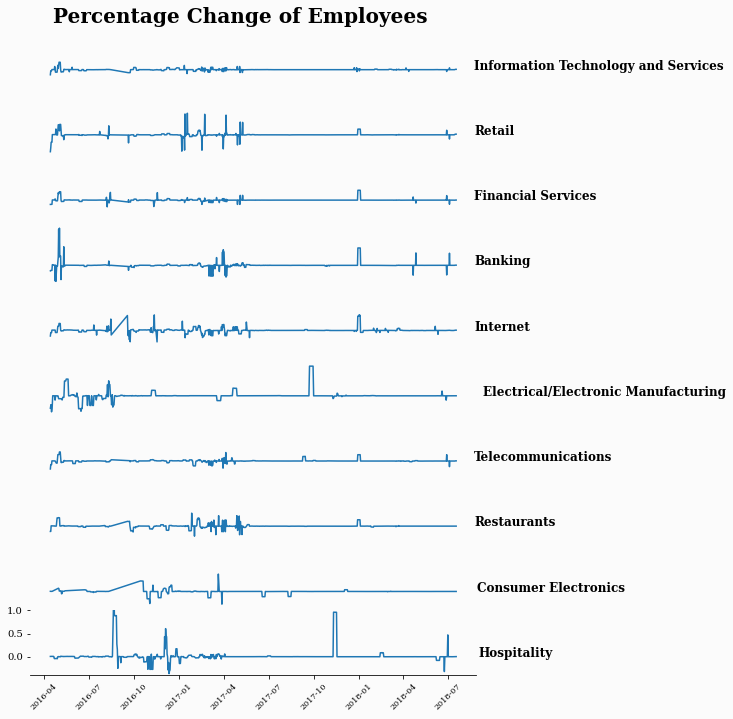

In [665]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[8, 12])
gs = fig.add_gridspec(10, 1)
gs.update(hspace=0, wspace=0.05)
ax0 = fig.add_subplot(gs[0, 0], ylim=[-0.4, 1])
ax1 = fig.add_subplot(gs[1, 0], ylim=[-0.4, 1])
ax2 = fig.add_subplot(gs[2, 0], ylim=[-0.4, 1])
ax3 = fig.add_subplot(gs[3, 0], ylim=[-0.4, 1])
ax4 = fig.add_subplot(gs[4, 0], ylim=[-0.4, 1])
ax5 = fig.add_subplot(gs[5, 0], ylim=[-0.4, 1])
ax6 = fig.add_subplot(gs[6, 0], ylim=[-0.4, 1])
ax7 = fig.add_subplot(gs[7, 0], ylim=[-0.4, 1])
ax8 = fig.add_subplot(gs[8, 0], ylim=[-0.4, 1])
ax9 = fig.add_subplot(gs[9, 0], ylim=[-0.4, 1])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
upper_axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

#ax0.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


sns.lineplot(ax=ax0, zorder=3,
             x='as_of_date', y='pct_change_employees', data=its_mean)
sns.lineplot(ax=ax1, zorder=4,
             x='as_of_date', y='pct_change_employees', data=retail_mean)
sns.lineplot(ax=ax2, zorder=5,
             x='as_of_date', y='pct_change_employees', data=finance_mean)
sns.lineplot(ax=ax3, zorder=6,
             x='as_of_date', y='pct_change_employees', data=banking_mean)
sns.lineplot(ax=ax4, zorder=7,
             x='as_of_date', y='pct_change_employees', data=internet_mean)
sns.lineplot(ax=ax5, zorder=8,
             x='as_of_date', y='pct_change_employees', data=electron_mean)
sns.lineplot(ax=ax6, zorder=9,
             x='as_of_date', y='pct_change_employees', data=tele_mean)
sns.lineplot(ax=ax7, zorder=10,
             x='as_of_date', y='pct_change_employees', data=restaurant_mean)
sns.lineplot(ax=ax8, zorder=11,
             x='as_of_date', y='pct_change_employees', data=consumer_mean)
sns.lineplot(ax=ax9, zorder=12,
             x='as_of_date', y='pct_change_employees', data=hospitality_mean)

ax0.text(Timestamp('2015-10-01'), 1, 
         'Percentage Change of Employees',
         fontsize=20, fontweight='bold')

ax0.text(Timestamp('2018-09-01'), 0, 'Information Technology and Services',
         fontsize=12, fontweight='bold')
ax1.text(Timestamp('2018-09-01'), 0, 'Retail',
         fontsize=12, fontweight='bold')
ax2.text(Timestamp('2018-09-01'), 0, 'Financial Services',
         fontsize=12, fontweight='bold')
ax3.text(Timestamp('2018-09-01'), 0, 'Banking',
         fontsize=12, fontweight='bold')
ax4.text(Timestamp('2018-09-01'), 0, 'Internet',
         fontsize=12, fontweight='bold')
ax5.text(Timestamp('2018-09-01'), 0, 'Electrical/Electronic Manufacturing',
         fontsize=12, fontweight='bold')
ax6.text(Timestamp('2018-09-01'), 0, 'Telecommunications',
         fontsize=12, fontweight='bold')
ax7.text(Timestamp('2018-09-01'), 0, 'Restaurants',
         fontsize=12, fontweight='bold')
ax8.text(Timestamp('2018-09-01'), 0, 'Consumer Electronics',
         fontsize=12, fontweight='bold')
ax9.text(Timestamp('2018-09-01'), 0, 'Hospitality',
         fontsize=12, fontweight='bold')

for s in ['top', 'left', 'right']:
    for ax in axes:
        ax.spines[s].set_visible(False)

ax0.set_xticklabels('')
ax0.tick_params(bottom=False)
ax0.spines['bottom'].set_visible(False)
ax1.set_xticklabels('')
ax1.tick_params(bottom=False)
ax1.spines['bottom'].set_visible(False)
ax2.set_xticklabels('')
ax2.tick_params(bottom=False)
ax2.spines['bottom'].set_visible(False)
ax3.set_xticklabels('')
ax3.tick_params(bottom=False)
ax3.spines['bottom'].set_visible(False)
ax4.set_xticklabels('')
ax4.tick_params(bottom=False)
ax4.spines['bottom'].set_visible(False)
ax5.set_xticklabels('')
ax5.tick_params(bottom=False)
ax5.spines['bottom'].set_visible(False)
ax6.set_xticklabels('')
ax6.tick_params(bottom=False)
ax6.spines['bottom'].set_visible(False)
ax7.set_xticklabels('')
ax7.tick_params(bottom=False)
ax7.spines['bottom'].set_visible(False)
ax8.set_xticklabels('')
ax8.tick_params(bottom=False)
ax8.spines['bottom'].set_visible(False)

for xtick in ax9.get_xticklabels():
        xtick.set_fontsize(8)
        xtick.set_rotation(45)

for ax in upper_axes:
    ax.set_yticklabels('')
    ax.tick_params(left=False)
for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None);

**Compare the fluctuation of company size across industries, "Information Technology and Services", "Financial Services, " Telecommunications", and "Restaurants" are relatively stable.**

**I used Density-Based Spatial Clustering of Applications with Noise (DBSCAN) to classify companies according to the change pattern of company size.**

In [863]:
company_cls = StandardScaler().fit_transform(company_cls)
db = DBSCAN(eps=0.5, min_samples=50)
db.fit(company_cls)
labels = db.labels_
cluster = pd.DataFrame(labels, columns=['cluster'])
company_af_cls = company.join(cluster)
company_af_cls['industry'] = company_af_cls['industry'].astype('category')
company_af_cls

,company_name,count,mean,median,min,max,std,cv,change,industry,cluster
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services,0
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services,0
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services,0
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services,0
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services,0
...,...,...,...,...,...,...,...,...,...,...,...
1543,"Summit Hotel Properties, Inc.",354,46.593220,46.0,45,51,1.538389,0.033017,0.128774,Hospitality,0
1544,Sunstone Hotel Investors Inc.,93,85.000000,85.0,85,85,0.000000,0.000000,0.000000,Hospitality,0
1545,Workspring,165,10.357576,11.0,8,11,0.883118,0.085263,0.096548,Hospitality,0
1546,Workspring by Steelcase,227,8.149780,8.0,6,11,1.494692,0.183403,-0.490811,Hospitality,-1


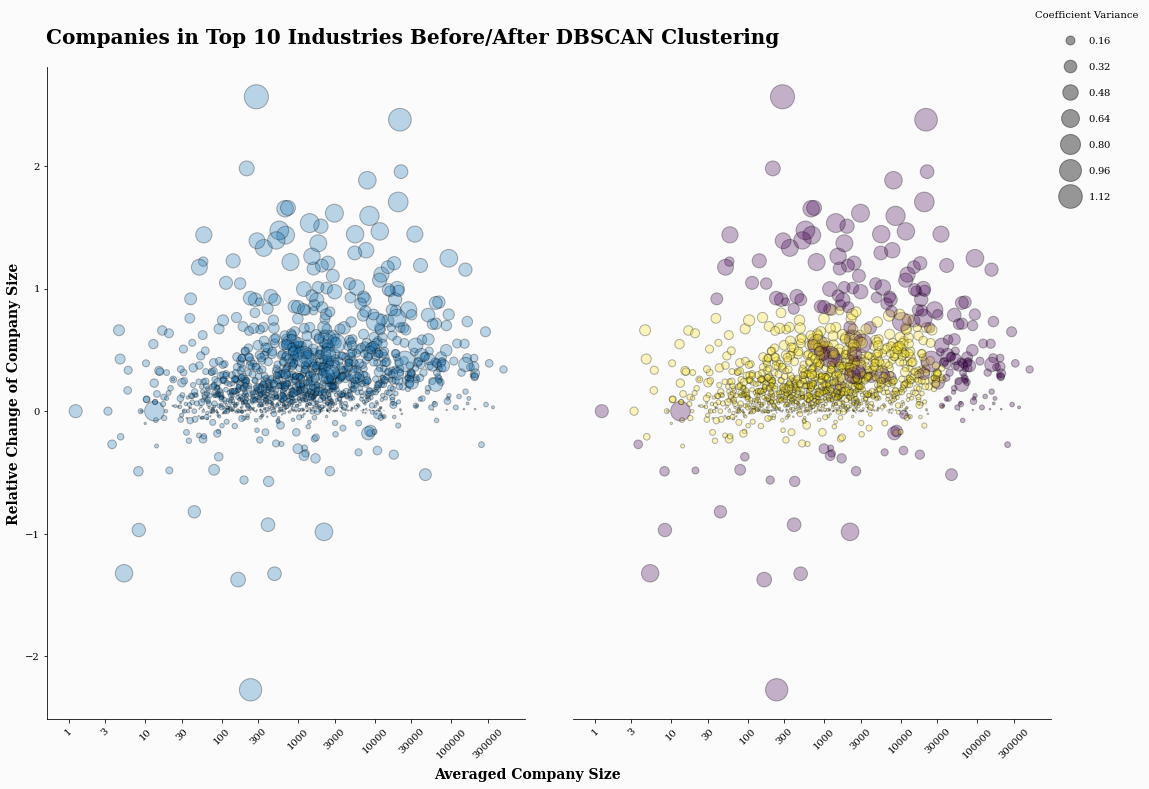

In [864]:
fig = plt.figure(figsize=[18, 12])
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
ax1.spines['left'].set_visible(False)

cmap = sns.color_palette("vlag", as_cmap=True)

ax0.scatter(company['mean'], company['change'], s=company['cv']*500, 
            alpha=.3, edgecolors='black')

scatter = ax1.scatter(company_af_cls['mean'], company_af_cls['change'], s = company_af_cls['cv']*500,
            c = company_af_cls['cluster'],
            alpha=.3, edgecolors='black')

ax0.text(0.5, 3.0,
         'Companies in Top 10 Industries Before/After DBSCAN Clustering',
         fontsize=20, fontweight='bold')


ax0.text(60000, -3, 
         'Averaged Company Size',
         fontsize=14, fontweight='bold')
ax0.set_ylabel('Relative Change of Company Size',
               fontsize=14, fontweight='bold')

ax0.set_xscale('log')
ax1.set_xscale('log')
xtick = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
ax0.set_xticks(xtick)
ax1.set_xticks(xtick)
ax0.set_xticklabels(xtick, rotation=45)
ax1.set_xticklabels(xtick, rotation=45)
ax1.set_yticklabels('')
ax0.minorticks_off()
ax1.minorticks_off()
ax1.tick_params(left=False)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.4)
labels = ['$\\mathdefault{0.16}$',
 '$\\mathdefault{0.32}$',
 '$\\mathdefault{0.48}$',
 '$\\mathdefault{0.64}$',
 '$\\mathdefault{0.80}$',
 '$\\mathdefault{0.96}$',
 '$\\mathdefault{1.12}$']
legend2 = ax1.legend(handles, labels, 
                     loc="upper right", bbox_to_anchor=[1, 1, 0.2, 0.1],
                     title="Coefficient Variance", labelspacing=1.5, fontsize=10, 
                     edgecolor=bg_color, facecolor=bg_color);

**Distribution of companies in popular industries**
each data dot represents one company:
- *x-axis: averaged company size in three years*
- *y-axis: relative change of company size: (last day-first day)/mean*
- *size: coefficient variance of company size*
- *color: cluster result of DBSCAN*

The DBSCAN model identified one cluster of companies (yellow). They have small change in company size and small overall fluctuation. In addition, I would like to classify the remaining companies into two groups: one is shrinking the size(below the cluster in the graph with negative relative change values) and the other is expanding the size(above the cluster with positive relative change values). 

## Conclusion

1. In this dataset, most companies are expanding from 2015 to 2018;
2. Based on the extent of expansion and fluctuation in company size, these companies could be clustered into three categories:
- Stable expansion: Variance of the size change is small. Slow expansion in three years.
- Rapid expansion: Variance is usually larger. Over 0.5 relative increase in company size.
- Shrinkage: Relative change in company size is negative. Variance is large.
3. Overall, "Information Technology and Services", "Financial Services, " Telecommunications", and "Restaurants" are relatively more stable than other industries.